# **Projeto Exemplo de Classificação de Tipos de Flores - Etapa 1**

### Este Notebook detalha todas as etapas referentes a primeira entrega para um projeto de exemplo.

### 1. Baixar o Dataset do Kaggle

In [1]:
!pip install opendatasets
!pip install pandas
!pip install imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 8.0 MB/s eta 0:00:00


In [3]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/balraj98/clothing-coparsing-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: raphaelmdecarvalho
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/balraj98/clothing-coparsing-dataset


100%|██████████| 134M/134M [00:00<00:00, 764MB/s] 

In [4]:
!ls

clothing-coparsing-dataset  sample_data


### 2. Criar um Dataframe com os metadados das imagens

In [5]:
import cv2
import os

In [6]:
root_dir = './clothing-coparsing-dataset/train'

In [7]:
import pandas as pd
import imagehash
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
count_corrupted = 0
corrupted = list()

In [11]:
import os

print("Diretório atual:", os.getcwd())
print("A pasta existe?:", os.path.exists(root_dir))
print(os.listdir("/content"))
print(os.listdir("/content/clothing-coparsing-dataset"))


Diretório atual: /content
A pasta existe?: False
['.config', 'clothing-coparsing-dataset', 'sample_data']
['images', 'class_dict.csv', 'labels', 'labels_raw', 'metadata.csv']


In [13]:
import os
import cv2
from PIL import Image
import imagehash

root_dir = "/content/clothing-coparsing-dataset/images"

dataframe_list = []
corrupted = []
count_corrupted = 0

for image in os.listdir(root_dir):
    img_dir = os.path.join(root_dir, image)

    # Verificar se é realmente um arquivo de imagem
    if not os.path.isfile(img_dir):
        continue

    try:
        _, image_format = image.split('.')
        image_format = image_format.lower()
    except ValueError:
        image_format = None

    img = cv2.imread(img_dir)

    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_hash = imagehash.phash(img_pil)
        height, width, channels = img.shape
        img_corrupted = False
    else:
        count_corrupted += 1
        corrupted.append(img_dir)
        img_corrupted = True
        img_hash, image_format, width, height, channels = None, None, None, None, None

    dataframe_list.append([img_dir, img_corrupted, img_hash, image_format, width, height, channels])

print("Total de imagens processadas:", len(dataframe_list))
print("Imagens corrompidas:", count_corrupted)


Total de imagens processadas: 2098
Imagens corrompidas: 0


In [45]:
print(f'Total de Imagens Corrompidas: {count_corrupted}\nImagens corrompidas {corrupted}')

Total de Imagens Corrompidas: 0
Imagens corrompidas []


In [47]:
import pandas as pd

dataframe_list_with_label = [row + [None] for row in dataframe_list]

df = pd.DataFrame(
    columns=['image_path', 'corrupted', 'image_hash', 'image_format', 'width', 'height', 'channels', 'label'],
    data=dataframe_list_with_label
)

In [48]:
df.head()

,image_path,corrupted,image_hash,image_format,width,height,channels,label
0,/content/clothing-coparsing-dataset/images/143...,False,b4538fc9136c6cd2,jpg,550,831,3,None
1,/content/clothing-coparsing-dataset/images/062...,False,f3b5a45b4b241c8d,jpg,550,832,3,None
2,/content/clothing-coparsing-dataset/images/164...,False,b35889a266594bf3,jpg,550,828,3,None
3,/content/clothing-coparsing-dataset/images/066...,False,b3f6cb834c5d2438,jpg,550,842,3,None
4,/content/clothing-coparsing-dataset/images/205...,False,abf3d2a563cc8c18,jpg,550,834,3,None


### 3. Verificar a Integridade dos Arquivos

In [49]:
#Informações estatísticas dos valores de altura, largura e canais das imagens

df.describe().loc[['mean', 'std', 'min', 'max']]

,width,height,channels
mean,550.0,828.497140,3.0
std,0.0,10.728418,0.0
min,550.0,786.000000,3.0
max,550.0,877.000000,3.0


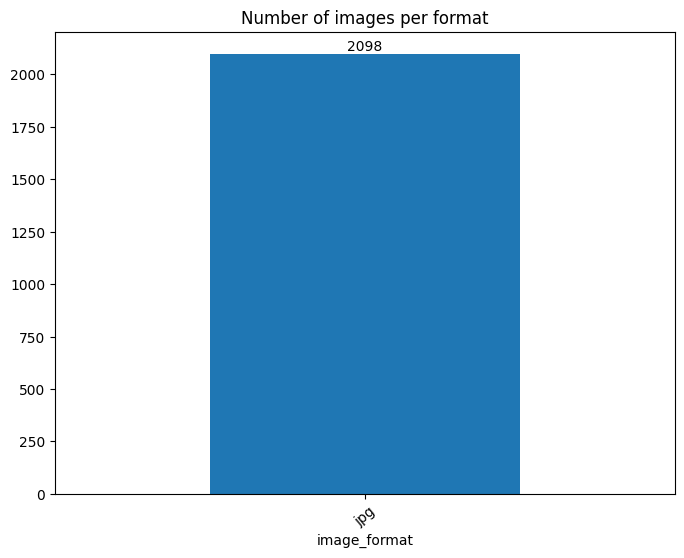

In [50]:
#Quantidade de Imagens por formato (JPG, PNG, etc.)

# Geração do gráfico de barras
ax = df['image_format'].value_counts().plot(kind='bar', title='Number of images per format', figsize=(8, 6))

# Rotacionando os rótulos no eixo X
plt.xticks(rotation=40)

# Adicionando os valores exatos em cima de cada barra
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.show()

### 4. Verificar a Consistência dos Metadados

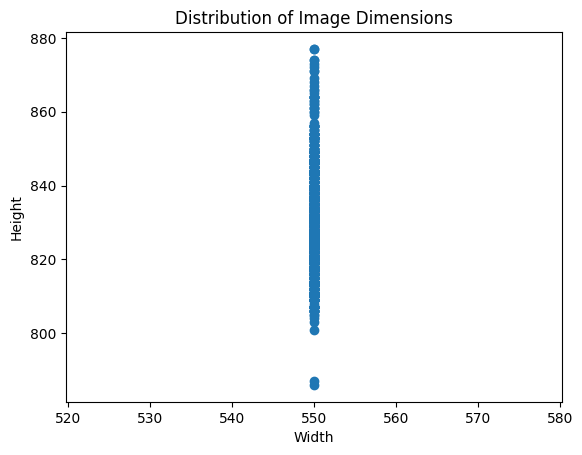

In [51]:
#Distribuição das Dimensões de Altura e Largura das Imagens

plt.scatter(df['width'], df['height'])
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Distribution of Image Dimensions')
plt.show()

In [52]:
#Quantidade de informações nulas
df.isnull().sum()

,0
image_path,0
corrupted,0
image_hash,0
image_format,0
width,0
height,0
channels,0
label,2098


### 5. Analisar a Qualidade das Imagens

In [53]:
#Total de imagens corrompidas

df['corrupted'].sum()

np.int64(0)

In [54]:
#Quantidade de imagens corrompidas e não corrompidas

df['corrupted'].value_counts()

,count
corrupted,
False,2098


### 6. Verificar a Distribuição das Classes

IndexError: index 0 is out of bounds for axis 0 with size 0

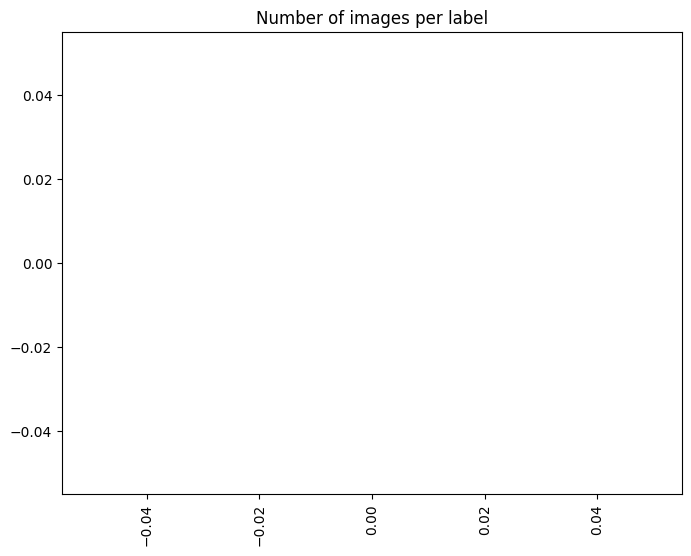

In [56]:
#Número de Imagens por Classe

ax = df['label'].value_counts().plot(kind='bar', title='Number of images per label', figsize=(8, 6))

# Rotacionando os rótulos no eixo X
plt.xticks(rotation=40)

# Adicionando os valores exatos em cima de cada barra
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.show()

### 7. Verificar a Presença de Duplicatas

In [57]:
#Quantidade de imagens duplicatas

df['image_hash'].duplicated().sum()

np.int64(2)

In [58]:
#Imagens duplicatas

df_duplicated = df[df['image_hash'].duplicated()]
df_duplicated

,image_path,corrupted,image_hash,image_format,width,height,channels,label
399,/content/clothing-coparsing-dataset/images/170...,False,b69cd0f21d1d51f0,jpg,550,825,3,None
1249,/content/clothing-coparsing-dataset/images/167...,False,a3ead6960c09f1f1,jpg,550,834,3,None


In [30]:
duplicated_images = {}
for i in range(df_duplicated.shape[0]):
  hash_duplicated = df_duplicated.iloc[i]['image_hash']
  duplicated = df[df['image_hash'] == hash_duplicated]["image_path"].values
  duplicated_images[str(hash_duplicated)] = duplicated.tolist()

In [34]:
#Imagens correspondentes a cada imagem duplicada

duplicated_images

{'b69cd0f21d1d51f0': ['/content/clothing-coparsing-dataset/images/0025.jpg',
  '/content/clothing-coparsing-dataset/images/1707.jpg'],
 'a3ead6960c09f1f1': ['/content/clothing-coparsing-dataset/images/1790.jpg',
  '/content/clothing-coparsing-dataset/images/1671.jpg']}

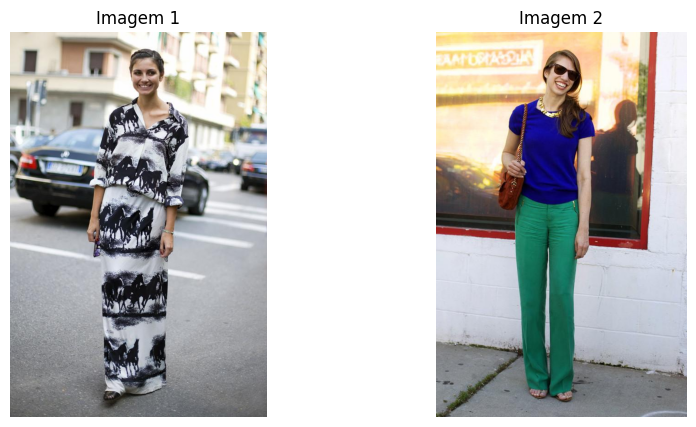

In [36]:
image1 = cv2.imread('/content/clothing-coparsing-dataset/images/0025.jpg')
image2 = cv2.imread('/content/clothing-coparsing-dataset/images/1790.jpg')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Converter de BGR (formato OpenCV) para RGB (formato Matplotlib)
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Mostrar a primeira imagem
axes[0].imshow(image1_rgb)
axes[0].axis('off')  # Remove os eixos
axes[0].set_title('Imagem 1')

# Mostrar a segunda imagem
axes[1].imshow(image2_rgb)
axes[1].axis('off')  # Remove os eixos
axes[1].set_title('Imagem 2')

# Exibir as imagens
plt.show()

In [44]:
# Agrupando duplicatas por classe (coluna 'label') e contando
duplicates_by_class = df_duplicated.groupby('label').size()

# Gerando o gráfico de barras
ax = duplicates_by_class.plot(kind='bar', title='Number of duplicates per class', figsize=(8, 6))

# Adicionando os valores exatos em cima de cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Ajustando a rotação dos rótulos no eixo X
plt.xticks(rotation=40)

# Exibindo o gráfico
plt.show()

KeyError: 'label'